[Download DATASETS from here](https://drive.google.com/drive/folders/1cBv9fiBQE2PedVPvTu56tOMIOtJTjTj1?usp=sharing)

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/Shareddrives/utshabkg/Dataset/plasma_processed.csv')
df.head()

,Unnamed: 0,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,2-hydroxyvaleric acid,2-ketoglucose dimethylacetal NIST,2-ketoisocaproic acid,3-(3-hydroxyphenyl)propionic acid,3-aminoisobutyric acid,3-hydroxybutanoic acid,3-hydroxybutyric acid,3-phosphoglycerate,5-hydroxynorvaline NIST,5-methoxytryptamine,acetoacetate,aconitic acid,adenosine-5-monophosphate,alanine,alloxanoic acid NIST,alpha-ketoglutarate,aminomalonate,arabitol,arachidic acid,arachidonic acid,asparagine,aspartic acid,azelaic acid,behenic acid,benzoic acid,beta-alanine,butane-2_3-diol NIST,butyrolactam NIST,capric acid,caprylic acid,...,pelargonic acid,phenol,phenylalanine,phenylethylamine,phosphate,phosphoethanolamine,pipecolinic acid,piperidone,proline,propane-1_3-diol NIST,pseudo uridine,pyrophosphate,pyrrole-2-carboxylic acid,pyruvic acid,quinic acid,ribose,salicylaldehyde,salicylic acid,serine,shikimic acid,stearic acid,sucrose,tartaric acid,taurine,threitol,threonic acid,threonine,tocopherol alpha-,tocopherol gamma-,trans-4-hydroxyproline,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose,Class
0,1,9483,103,101,963,389,123,20744,139,36,955,79,6387,65,290,1153,2318,62,83,363,418,97,210,190781,153,386,894,36,2294,234,873,664,76,311,1414,697,374,177,219,496,...,3298,1310,12552,95,35856,110,586,84,124169,565,525,2769,416,10789,127,97,160,68,7392,414,85957,82,82,2160,336,778,13505,2429,303,2248,27450,52403,73,255067,10057,63,157332,154,1380,disease
1,2,27468,207,155,335,227,178,8611,78,91,103,73,5609,112,861,384,1624,162,88,65,414,191,148,218774,113,255,1043,324,2258,296,1281,770,102,252,1750,195,274,132,253,479,...,2621,1528,12924,266,42098,44,392,67,113966,669,1178,2406,97,6206,77,187,384,209,5719,453,66836,273,35,1446,192,566,12687,1882,681,2926,17898,37179,157,180080,8386,118,103083,324,929,disease
2,3,13976,86,78,176,152,83,22792,92,97,1010,97,7600,139,331,917,3997,110,161,207,338,118,731,239741,64,363,763,400,2417,682,1203,710,56,311,1740,261,84,82,250,431,...,4059,2058,9682,162,41771,109,419,71,87775,593,598,6129,50,4167,470,116,191,1279,5028,64,119546,137,60,2678,158,871,10976,4433,667,2862,29503,30670,211,138861,15822,119,92045,253,610,disease
3,4,19449,178,104,467,270,157,29418,123,92,289,71,3388,68,2141,465,33679,120,100,87,454,147,311,99474,86,203,1027,223,3927,627,1098,558,74,529,2605,213,238,252,278,813,...,8027,1853,11710,490,38775,93,217,64,65156,869,926,1891,107,2180,63,181,249,87,9764,326,161987,83,77,3198,207,783,12727,2042,447,3036,16501,27573,71,183633,14024,102,97349,223,746,disease
4,5,17209,258,103,979,314,211,16713,76,42,1126,139,6833,679,1098,1487,5414,139,370,202,329,174,313,238858,218,291,2760,366,3156,368,1082,661,35,415,1457,707,227,96,278,442,...,4065,1190,13357,113,55245,132,150,38,60725,534,1109,4951,353,4583,2687,120,204,108,9031,219,94444,91,30,1737,407,283,16981,1980,508,4357,24023,30096,222,255081,23154,58,159671,189,2022,disease


In [2]:
labels = np.reshape(df.Class.to_numpy(), (82,1))
# labels

# Student's   t-Test

In [3]:
X = df.drop('Class', axis=1)
y = df['Class'].copy()
y = y.map({"control": 1, "disease": 0})

X.shape, y.shape

((82, 159), (82,))

In [4]:
disease = df[(df['Class']=='disease')]
control = df[(df['Class']=='control')]

In [5]:
from scipy import stats

Before the t-test can be conducted, one needs to test the assumptions. First to test for the homogeneity of variances. To do this, I will use Levene’s test for homogeneity of variance. 

In [6]:
stats.levene(disease['1_5-anhydroglucitol'], control['1_5-anhydroglucitol'])

LeveneResult(statistic=0.9232842255878866, pvalue=0.33950937635055467)

The test is not significant meaning there is homogeneity of variances and we can proceed. If the test were to be significant, a viable alternative would be to conduct a Welch’s t-test. Next to test the assumption of normality. This can be done visually with a histogram and/or as a q-q plot, and by using the Shapiro-Wilk test which is the stats.shaprio() method. First, I will check them visually.

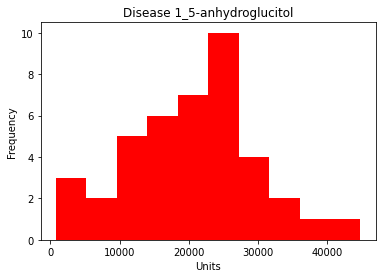

In [7]:
disease['1_5-anhydroglucitol'].plot(kind="hist", title="Disease 1_5-anhydroglucitol", color='red')
plt.xlabel("Units")
plt.savefig('disease_1_5-anhydroglucitol')

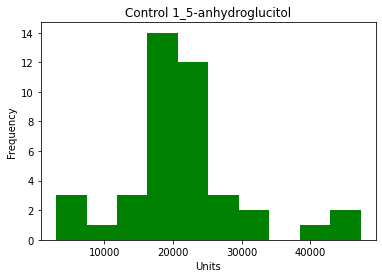

In [8]:
control['1_5-anhydroglucitol'].plot(kind='hist', title='Control 1_5-anhydroglucitol', color='green')
plt.xlabel("Units")
plt.savefig('control_1_5-anhydroglucitol')

From the looks of the histogram, each variable appears to be fairly normally distributed. Let’s see how it looks on a q-q plot, it’s easier to get a sense of normality visualizing the data as q-q plot. If you are unfamiliar with reading a q-q plot, the data should be on the red line. If there are data points that are far off of it, it’s an indication that there are some deviations from normality.

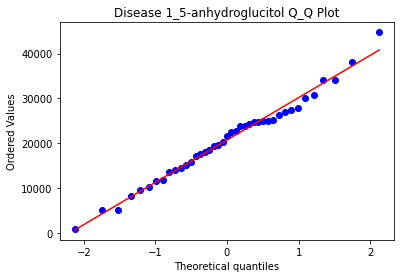

In [9]:
stats.probplot(disease['1_5-anhydroglucitol'], dist='norm', plot=plt)
plt.title('Disease 1_5-anhydroglucitol Q_Q Plot')
plt.savefig('disease_1_5-anhydroglucitol_qqplot')

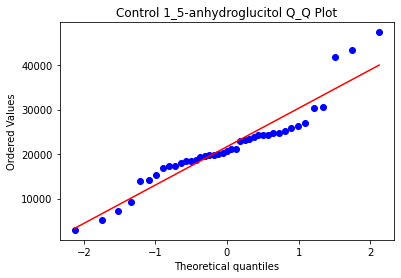

In [10]:
stats.probplot(control['1_5-anhydroglucitol'], dist='norm', plot=plt)
plt.title('Control 1_5-anhydroglucitol Q_Q Plot')
plt.savefig('control_1_5-anhydroglucitol_qqplot')

There is some deviation from normality in the Control q-q plot, but it does not appear to be a large violation. In all, the data looks to have normality. To be sure, we can test it statistically using the Shapiro-Wilk test for normality. The first value is the W test statistic and the second value is the p-value.

In [11]:
stats.shapiro(disease['1_5-anhydroglucitol'])

(0.9895632266998291, 0.966071605682373)

In [12]:
stats.shapiro(control['1_5-anhydroglucitol'])

(0.9127679467201233, 0.0040376451797783375)

Neither of the tests for normality we significant meaning neither of the variables violates the assumption of normality. We can continue as planned(Independent t-test).

In [13]:
stats.ttest_ind(disease['1_5-anhydroglucitol'], control['1_5-anhydroglucitol'])

Ttest_indResult(statistic=-0.4622362131299635, pvalue=0.6451666190665313)

In [14]:
def ttest(feature):
    l_test = stats.levene(disease[feature], control[feature])
    disease_shapiro = stats.shapiro(disease[feature])
    control_shapiro = stats.shapiro(control[feature])
    t_test = stats.ttest_ind(disease[feature], control[feature])
    return feature, l_test, disease_shapiro, control_shapiro, t_test

In [15]:
df.columns[0]

'Unnamed: 0'

In [16]:
result = []
for i in range(1, 159):
    result.append(ttest(df.columns[i]))

In [17]:
result_df = pd.DataFrame(result, columns=['Metabolics', 'Levene test(Statistic, P-Value)', 'Disease(Statistic, P-Value)', 'Control(Statistic, P-Value)', 't-Test(Statistic, P-Value)'])
result_df.to_csv('t-Test.csv')
result_df

,Metabolics,"Levene test(Statistic, P-Value)","Disease(Statistic, P-Value)","Control(Statistic, P-Value)","t-Test(Statistic, P-Value)"
0,1_5-anhydroglucitol,"(0.9232842255878866, 0.33950937635055467)","(0.9895632266998291, 0.966071605682373)","(0.9127679467201233, 0.0040376451797783375)","(-0.4622362131299635, 0.6451666190665313)"
1,1-monostearin,"(2.6142516370451054, 0.10984420325840032)","(0.28778016567230225, 7.504324852497524e-13)","(0.9605392813682556, 0.1642741858959198)","(1.6070866714769132, 0.11197537619510857)"
2,2_3-dihydroxybutanoic acid NIST,"(0.006478335067887512, 0.9360500705169275)","(0.9374222755432129, 0.02565663307905197)","(0.9520214796066284, 0.08242195099592209)","(0.6879475533334403, 0.49347572580319143)"
3,2_4-diaminobutyric acid,"(0.09694042032074647, 0.7563425132995316)","(0.9051265120506287, 0.002357517834752798)","(0.9194269776344299, 0.006540666334331036)","(0.6835530035368601, 0.4962325505445554)"
4,2-deoxyerythritol,"(0.9084069671879834, 0.343408402153335)","(0.8347311615943909, 3.2259136787615716e-05)","(0.9222155809402466, 0.008035192266106606)","(0.5405038830337436, 0.5903512733009822)"
...,...,...,...,...,...
153,uric acid,"(0.13186210687409822, 0.7174668378397271)","(0.9512421488761902, 0.0773795023560524)","(0.9740689992904663, 0.46329164505004883)","(-2.9253877700432773, 0.0044752380964071786)"
154,uridine,"(0.032911189653374744, 0.8565011579184116)","(0.9404267072677612, 0.03250748664140701)","(0.9610063433647156, 0.17056143283843994)","(-0.013382196933877414, 0.9893561874149236)"
155,valine,"(0.354580548506568, 0.5532124135196737)","(0.9560147523880005, 0.11394419521093369)","(0.9369755983352661, 0.024774255231022835)","(-0.845799995812778, 0.40018707649117624)"
156,xylitol,"(0.31293965984454025, 0.57744470642991)","(0.5075222253799438, 1.518786763021751e-10)","(0.5687038898468018, 8.869149303869506e-10)","(-0.6099770154338351, 0.5436058219602455)"
